In [44]:
import numpy as np
import matplotlib.cm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pyqtgraph as pg
import tifffile
from pathlib import Path

In [45]:
results=pd.read_csv(r'Desktop\imagej.csv')
results=results.iloc[:,1:]
results

,trial_string,id,condition,Ac,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity
0,cancer_20201202_slip1_area2_long_acq_corr_long...,0,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,304,64.184,20.188,19.173,89.301,0.927,21.190,109.290,19.888,1.053,0.950,0.935
1,cancer_20201202_slip1_area2_long_acq_corr_long...,1,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,328,65.355,20.437,20.434,71.565,0.965,21.633,146.310,20.000,1.000,1.000,0.956
2,cancer_20201202_slip1_area2_long_acq_corr_long...,2,standard,active,cancer_20201202_slip1_area2_long_acq_corr_long...,296,64.184,20.985,17.960,49.133,0.903,22.472,57.724,18.385,1.168,0.856,0.938
3,cancer_20201202_slip1_area2_long_acq_corr_long...,3,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,259,60.426,18.731,17.605,173.015,0.891,20.881,163.301,18.336,1.064,0.940,0.906
4,cancer_20201202_slip1_area2_long_acq_corr_long...,4,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,230,55.355,18.109,16.171,111.900,0.943,19.313,111.251,16.760,1.120,0.893,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14852,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,133,MCF10A,inactive,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,236,58.184,19.011,15.806,60.513,0.876,20.000,53.130,16.263,1.203,0.831,0.927
14853,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,134,MCF10A,inactive,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,541,95.497,38.018,18.118,102.293,0.745,39.051,103.325,19.160,2.098,0.477,0.941
14854,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,135,MCF10A,inactive,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,520,95.497,38.106,17.375,73.586,0.717,40.497,69.775,18.918,2.193,0.456,0.950
14855,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,136,MCF10A,inactive,cancer_20210314_slip8_area2_long_acq_MCF10A_37...,531,86.669,30.631,22.072,18.764,0.888,31.048,14.931,22.313,1.388,0.721,0.951


In [46]:
ms=results[results['condition']=='standard']
ms

,trial_string,id,condition,Ac,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity
0,cancer_20201202_slip1_area2_long_acq_corr_long...,0,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,304,64.184,20.188,19.173,89.301,0.927,21.190,109.290,19.888,1.053,0.950,0.935
1,cancer_20201202_slip1_area2_long_acq_corr_long...,1,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,328,65.355,20.437,20.434,71.565,0.965,21.633,146.310,20.000,1.000,1.000,0.956
2,cancer_20201202_slip1_area2_long_acq_corr_long...,2,standard,active,cancer_20201202_slip1_area2_long_acq_corr_long...,296,64.184,20.985,17.960,49.133,0.903,22.472,57.724,18.385,1.168,0.856,0.938
3,cancer_20201202_slip1_area2_long_acq_corr_long...,3,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,259,60.426,18.731,17.605,173.015,0.891,20.881,163.301,18.336,1.064,0.940,0.906
4,cancer_20201202_slip1_area2_long_acq_corr_long...,4,standard,inactive,cancer_20201202_slip1_area2_long_acq_corr_long...,230,55.355,18.109,16.171,111.900,0.943,19.313,111.251,16.760,1.120,0.893,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6171,cancer_20201219_slip2_area2_long_acq_long_acq_...,120,standard,inactive,cancer_20201219_slip2_area2_long_acq_long_acq_...,234,60.284,21.532,13.837,96.864,0.809,22.361,79.695,14.000,1.556,0.643,0.923
6172,cancer_20201219_slip2_area2_long_acq_long_acq_...,121,standard,inactive,cancer_20201219_slip2_area2_long_acq_long_acq_...,434,84.184,24.606,22.457,134.253,0.770,28.844,146.310,24.000,1.096,0.913,0.942
6173,cancer_20201219_slip2_area2_long_acq_long_acq_...,122,standard,inactive,cancer_20201219_slip2_area2_long_acq_long_acq_...,484,93.740,36.494,16.886,21.855,0.692,40.853,21.541,18.860,2.161,0.463,0.939
6174,cancer_20201219_slip2_area2_long_acq_long_acq_...,123,standard,inactive,cancer_20201219_slip2_area2_long_acq_long_acq_...,234,65.698,24.868,11.981,15.884,0.681,26.571,19.799,14.000,2.076,0.482,0.930


In [47]:
values=ms.iloc[:,5:]
f=values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=values.columns


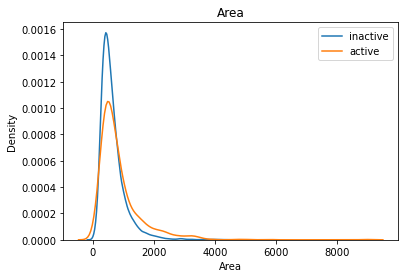

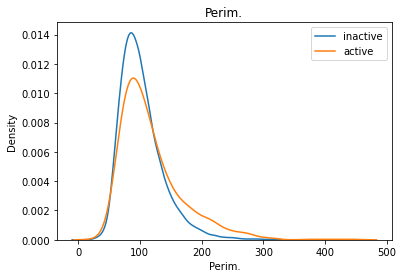

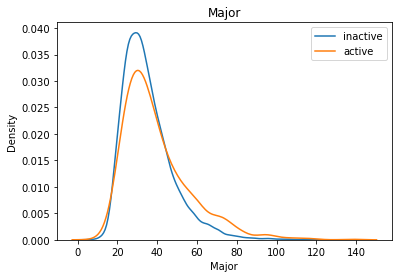

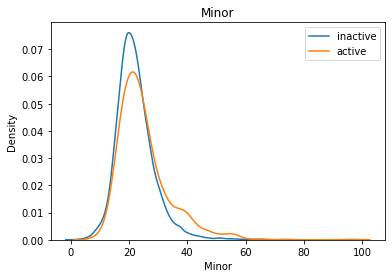

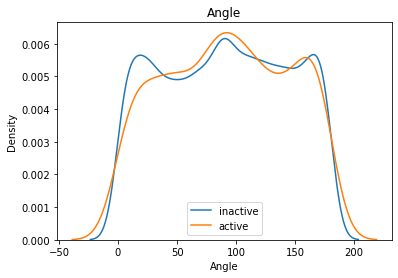

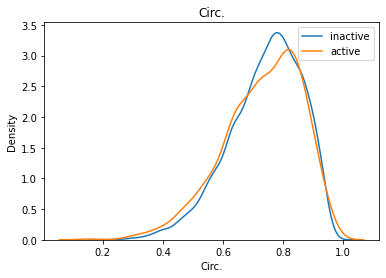

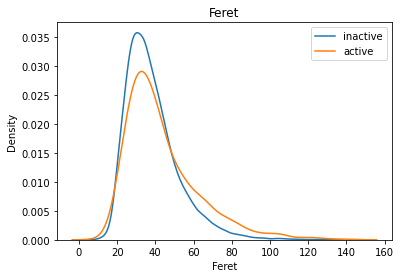

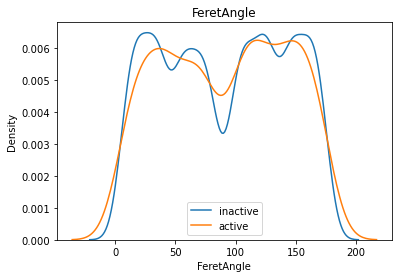

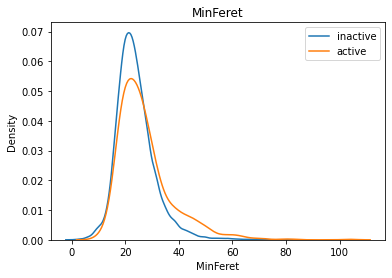

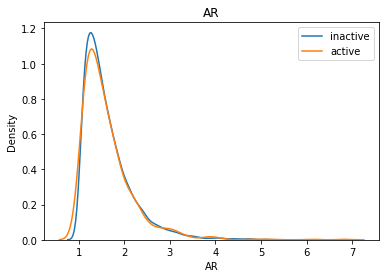

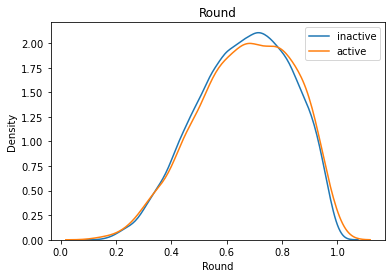

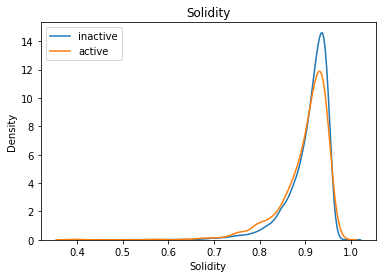

In [48]:
import seaborn as sns
for i in range(12):
    sns.kdeplot(results[results['Ac']=='inactive'].iloc[:,i+5],label='inactive',)
    sns.kdeplot(results[results['Ac']=='active'].iloc[:,i+5],label='active',)
    plt.legend()
    plt.title(results.columns[i+5])
    plt.show()

In [49]:
ms.index=fb.index
fb['Ac']=ms['Ac']
fb

,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity,Ac
0,0.487302,0.473294,0.552369,0.461380,0.592014,0.859804,0.491741,0.695350,0.460464,0.325979,0.923249,0.597940,inactive
1,0.498725,0.478675,0.556020,0.481475,0.501561,0.957351,0.498200,0.863528,0.462163,0.000000,1.000000,0.799255,inactive
2,0.483315,0.473294,0.563854,0.441402,0.378384,0.800909,0.509929,0.429995,0.437152,0.452099,0.782843,0.623848,active
3,0.463516,0.455199,0.529717,0.435424,0.971138,0.772248,0.487117,0.936608,0.436375,0.344952,0.908067,0.389728,inactive
4,0.446112,0.428411,0.519284,0.410613,0.700927,0.900235,0.461939,0.704624,0.410762,0.412757,0.837483,0.564768,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,0.448628,0.454489,0.571415,0.367588,0.629164,0.590446,0.508413,0.548962,0.362479,0.611242,0.485947,0.502923,inactive
3595,0.541747,0.552883,0.609903,0.512448,0.803274,0.512568,0.583497,0.863528,0.519863,0.387861,0.867361,0.659810,inactive
3596,0.558939,0.584205,0.720105,0.423122,0.205962,0.373405,0.681629,0.197140,0.444626,0.725937,0.263537,0.632684,inactive
3597,0.448628,0.480229,0.612916,0.330441,0.161975,0.355558,0.559806,0.183691,0.362479,0.713440,0.285511,0.556715,inactive


In [50]:
fb_s_active=pd.read_csv(r'C:\Users\Firefly\Desktop\Projection\fb_standard_with_type.csv')
fb_s_active=fb_s_active.iloc[:,1:]
fb_s_active

,Type,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,3,0.513196,0.699381,0.502991,0.472050,0.306299,0.628491,0.480746,0.510957,0.558144,...,0.581388,0.666353,0.600837,0.726488,0.607646,0.686063,0.926393,0.489250,0.501252,0.533085
1,3,0.271377,0.294033,0.724271,0.867073,0.514059,0.546456,0.315758,0.536838,0.378515,...,0.534654,0.748042,0.742753,0.832756,0.470122,0.611089,0.969176,0.601558,0.287222,0.388484
2,4,0.819428,0.790227,0.708368,0.098257,0.528142,0.545822,0.672943,0.538649,0.638524,...,0.377190,0.546665,0.300451,0.016927,0.470122,0.645579,0.000000,0.420243,0.369928,0.657949
3,4,0.767777,0.701654,0.888736,0.098257,0.494317,0.636621,0.729761,0.556497,0.580751,...,0.366423,0.544540,0.278157,0.022477,0.499367,0.707115,0.000000,0.000000,0.333445,0.702655
4,0,0.694671,0.906081,0.852272,0.837594,0.723937,0.513589,0.305726,0.746276,0.525721,...,0.459242,0.532817,0.295671,0.760189,0.555056,0.435138,0.531297,0.601558,0.257768,0.358724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,3,0.459745,0.552238,0.569316,0.428110,0.672919,0.544687,0.483767,0.589215,0.375069,...,0.527508,0.476938,0.372299,0.690431,0.555056,0.422057,0.952693,0.641309,0.472311,0.506423
424,3,0.789026,0.686649,0.624264,0.367783,0.426150,0.681155,0.646359,0.419527,0.597939,...,0.512658,0.519857,0.485150,0.676246,0.408141,0.594794,0.977136,0.641309,0.461831,0.615536
425,1,0.836248,0.797812,0.562957,0.623894,0.556854,0.620343,0.573367,0.549413,0.685050,...,0.482963,0.652992,0.468236,0.632336,0.408141,0.553453,0.487273,0.682204,0.439322,0.566834
426,1,0.623214,0.441429,0.452233,0.537996,0.621990,0.580518,0.529913,0.423918,0.497195,...,0.420696,0.742976,0.489268,0.612816,0.751668,0.522776,0.531297,0.903632,0.543126,0.549134


In [51]:
fb_active=fb[fb['Ac']=='active']
fb_active.index=fb_s_active.index
fb_active['Type']=fb_s_active['Type']
fb_active

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity,Ac,Type
0,0.483315,0.473294,0.563854,0.441402,0.378384,0.800909,0.509929,0.429995,0.437152,0.452099,0.782843,0.623848,active,3
1,0.542825,0.524704,0.604534,0.521157,0.886757,0.892583,0.545437,0.929242,0.505939,0.316254,0.929338,0.757169,active,3
2,0.567599,0.566867,0.677402,0.487049,0.263055,0.619752,0.622758,0.250538,0.498175,0.597255,0.513755,0.581161,active,4
3,0.512434,0.491223,0.584118,0.479732,0.500925,0.970579,0.522331,0.497891,0.462163,0.399848,0.853887,0.843231,active,4
4,0.514126,0.496245,0.579619,0.488276,0.850765,0.913061,0.524789,0.851728,0.477115,0.340064,0.911098,0.777980,active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.635825,0.638818,0.699359,0.604461,0.594766,0.495382,0.662896,0.823022,0.592827,0.451381,0.784309,0.408023,active,3
424,0.826967,0.846689,0.913647,0.714411,0.634617,0.184725,0.887371,0.683026,0.779695,0.684513,0.339076,0.077489,active,3
425,0.624212,0.631321,0.757471,0.505502,0.644154,0.471078,0.694381,0.654570,0.505939,0.684337,0.339076,0.757169,active,1
426,0.685083,0.668967,0.751505,0.641325,0.453705,0.619752,0.687868,0.372756,0.639238,0.516662,0.673308,0.540889,active,1


In [52]:
fb_waving=fb_active[fb_active['Type']==0].iloc[:,:-2]
fb_waving

,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretAngle,MinFeret,AR,Round,Solidity
4,0.514126,0.496245,0.579619,0.488276,0.850765,0.913061,0.524789,0.851728,0.477115,0.340064,0.911098,0.777980
6,0.501465,0.503190,0.626155,0.413244,0.212688,0.638968,0.573492,0.193293,0.430184,0.621729,0.463696,0.556715
41,0.550544,0.577598,0.661843,0.470624,0.045183,0.365238,0.631226,0.043078,0.519587,0.595533,0.517756,0.189413
53,0.539571,0.566867,0.617109,0.499383,0.870208,0.368494,0.603008,0.883688,0.514330,0.452813,0.782843,0.152829
59,0.578557,0.607859,0.699613,0.483229,0.970189,0.330382,0.670097,0.053558,0.515745,0.634429,0.437824,0.203085
...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.666810,0.659741,0.734067,0.625321,0.389221,0.551814,0.690732,0.300543,0.642099,0.503037,0.698911,0.502923
410,0.579148,0.593921,0.704919,0.478284,0.987593,0.447389,0.645438,0.125837,0.477115,0.647370,0.412292,0.312964
414,0.568848,0.562168,0.673786,0.493792,0.542187,0.693895,0.619641,0.538382,0.491697,0.582345,0.544606,0.678415
422,0.650351,0.654532,0.754695,0.561864,0.772313,0.465557,0.694689,0.847240,0.582124,0.621729,0.463696,0.395750


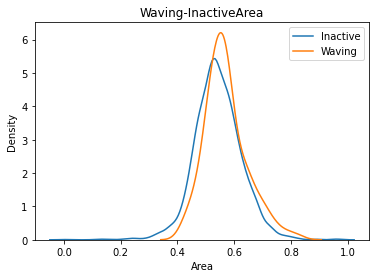

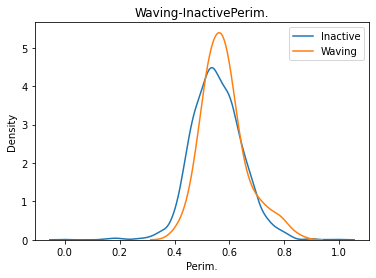

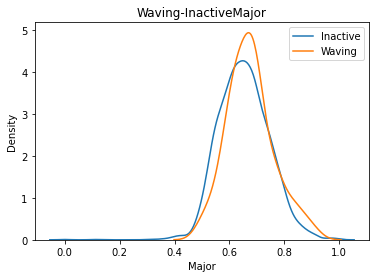

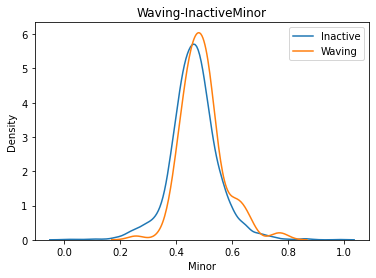

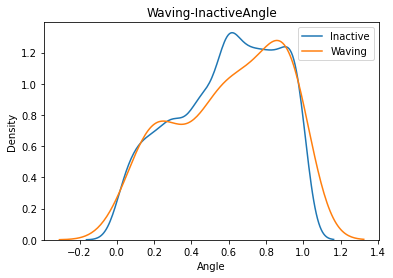

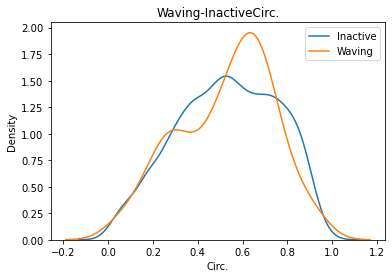

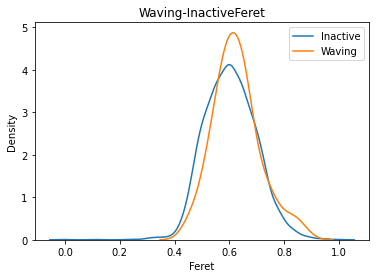

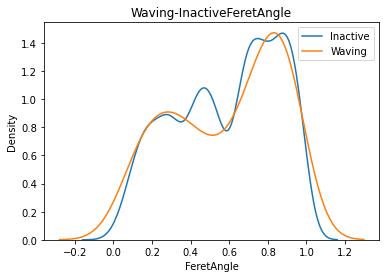

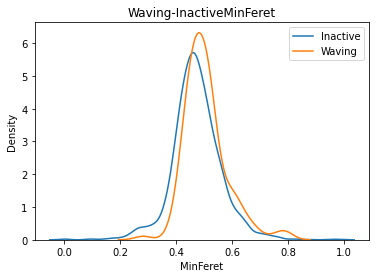

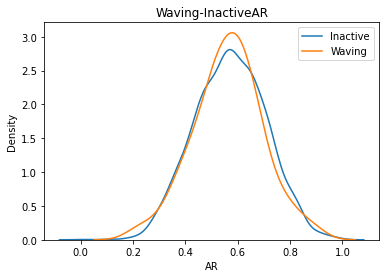

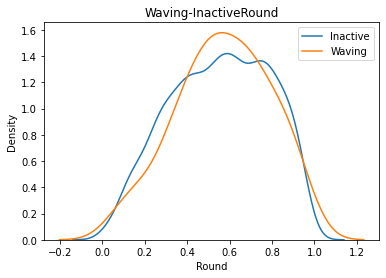

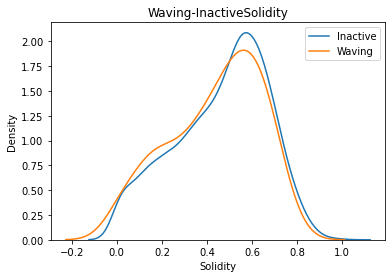

In [59]:
fb_inactive=fb[fb['Ac']=='inactive'].iloc[:,:-1]
import seaborn as sns
for i in range(12):
    sns.kdeplot(fb_inactive.iloc[:,i],label='Inactive',)
    sns.kdeplot(fb_waving.iloc[:,i],label='Waving',)
    plt.legend()
    plt.title('Waving-Inactive-'+fb.columns[i])
    #plt.savefig('Waving-Inactive'+fb.columns[i]+'.png')
    plt.show()